In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
### 数据读取
path  = 'data/'
train = pd.read_csv(path + 'security_train.csv')
test  = pd.read_csv(path + 'security_test.csv')

In [4]:
train_analysis = train[['file_id','label']].drop_duplicates(subset = ['file_id','label'], keep = 'last')

In [5]:
dic_ = train['file_id'].value_counts().to_dict()
train_analysis['file_id_cnt'] = train_analysis['file_id'].map(dic_).values

In [6]:
train_analysis['file_id_cnt'].value_counts()

5001     448
268      211
44       186
4        160
16       149
        ... 
8375       1
10422      1
35475      1
8367       1
2047       1
Name: file_id_cnt, Length: 6204, dtype: int64

C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='file_id_cnt', ylabel='Density'>

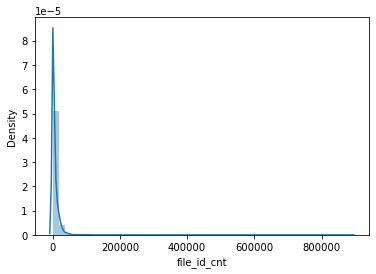

In [7]:
sns.distplot(train_analysis['file_id_cnt'])

In [8]:
print('There are {} data are below 10000'.format(np.sum(train_analysis['file_id_cnt'] <= 1e4) / train_analysis.shape[0]))

There are 0.8012529704039749 data are below 10000


In [9]:
###  file_id_cnt & label 分析
def file_id_cnt_cut(x):
    if x< 15000:
        return x // 1e3
    else:
        return 15

train_analysis['file_id_cnt_cut'] = train_analysis['file_id_cnt'].map(file_id_cnt_cut).values

Text(0, 0.5, 'label_number')

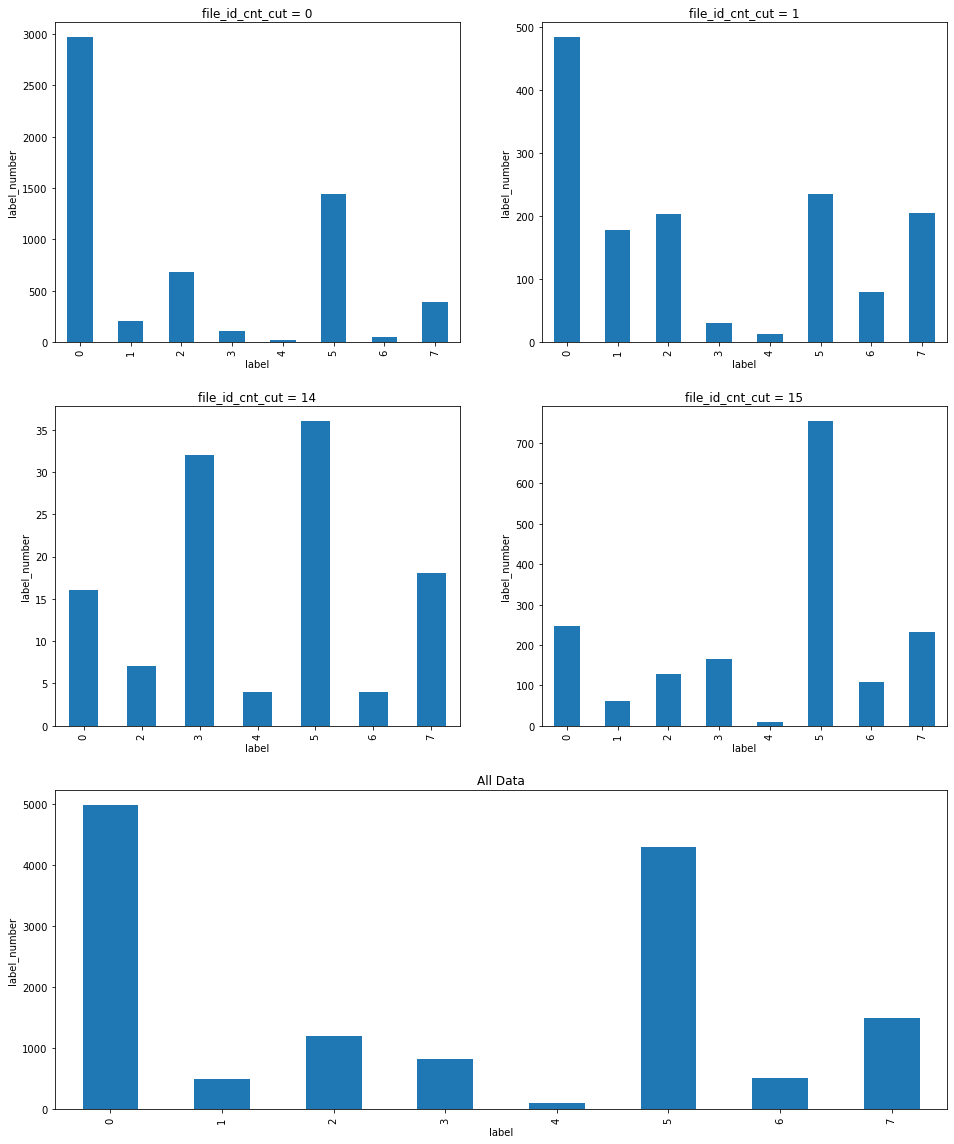

In [10]:
plt.figure(figsize=[16,20])
plt.subplot(321)
train_analysis[train_analysis['file_id_cnt_cut'] == 0]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('file_id_cnt_cut = 0')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(322)
train_analysis[train_analysis['file_id_cnt_cut'] == 1]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('file_id_cnt_cut = 1')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(323)
train_analysis[train_analysis['file_id_cnt_cut'] == 14]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('file_id_cnt_cut = 14')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(324)
train_analysis[train_analysis['file_id_cnt_cut'] == 15]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('file_id_cnt_cut = 15')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(313)
train_analysis['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('All Data')
plt.xlabel('label')
plt.ylabel('label_number')

C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\InstallSoft\Anaconda\

<AxesSubplot:xlabel='label', ylabel='file_id_cnt'>

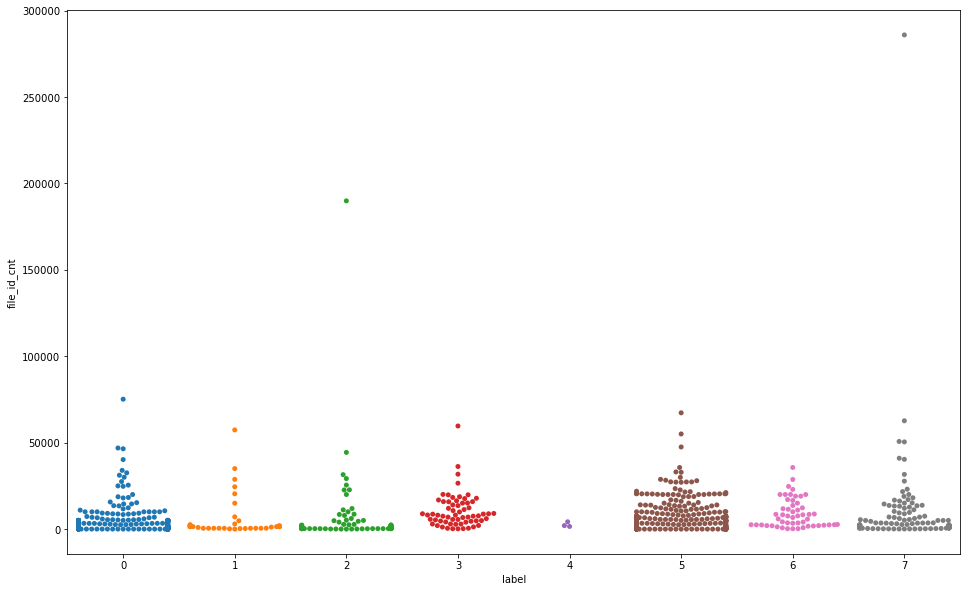

In [11]:
plt.figure(figsize=[16,10])
sns.swarmplot(x =train_analysis.iloc[:1000]['label'], y = train_analysis.iloc[:1000]['file_id_cnt'])

In [12]:
dic_ = train.groupby('file_id')['api'].nunique().to_dict()
train_analysis['file_id_api_nunique'] = train_analysis['file_id'].map(dic_).values

C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='file_id_api_nunique', ylabel='Density'>

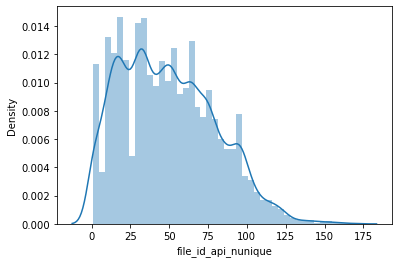

In [13]:
sns.distplot(train_analysis['file_id_api_nunique'])

Text(0, 0.5, 'label_number')

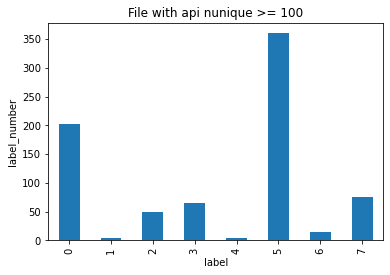

In [14]:
train_analysis.loc[train_analysis.file_id_api_nunique >=100]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('File with api nunique >= 100')
plt.xlabel('label')
plt.ylabel('label_number')

<AxesSubplot:xlabel='label', ylabel='file_id_api_nunique'>

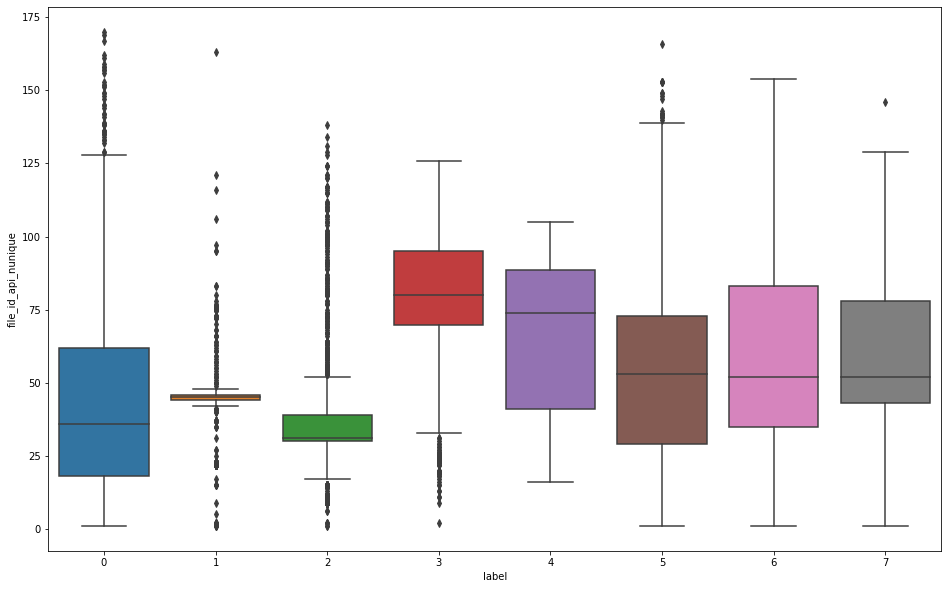

In [15]:
plt.figure(figsize=[16,10])
sns.boxplot(x =train_analysis['label'], y = train_analysis['file_id_api_nunique'])

In [16]:
dic_ = train.groupby('file_id')['index'].nunique().to_dict()
train_analysis['file_id_index_nunique'] = train_analysis['file_id'].map(dic_).values

C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='file_id_index_nunique', ylabel='Density'>

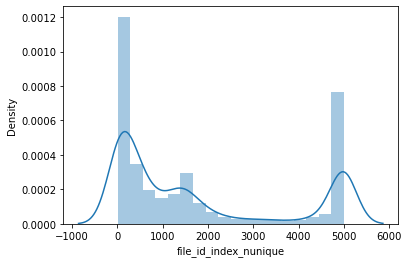

In [17]:
sns.distplot(train_analysis['file_id_index_nunique'])

Text(0, 0.5, 'label_number')

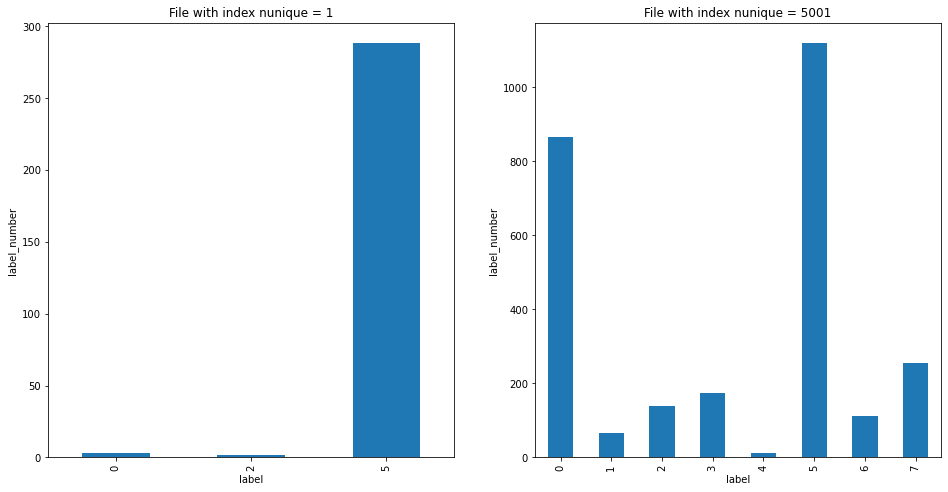

In [18]:
plt.figure(figsize=[16,8])
plt.subplot(121)
train_analysis.loc[train_analysis.file_id_index_nunique == 1]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('File with index nunique = 1')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(122)
train_analysis.loc[train_analysis.file_id_index_nunique == 5001]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('File with index nunique = 5001')
plt.xlabel('label')
plt.ylabel('label_number')

<AxesSubplot:xlabel='label', ylabel='file_id_api_nunique'>

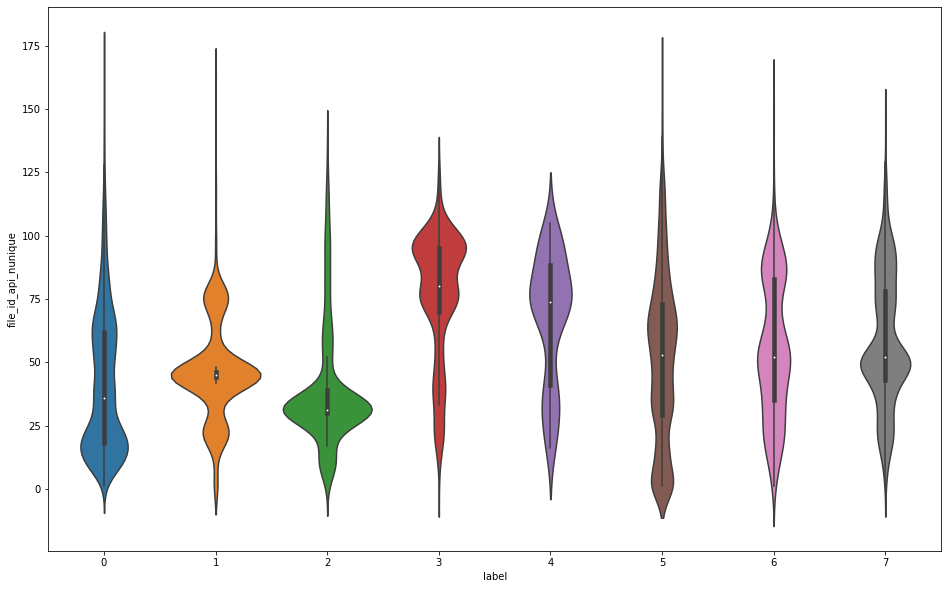

In [19]:
plt.figure(figsize=[16,10])
sns.violinplot(x =train_analysis['label'], y = train_analysis['file_id_api_nunique'])

In [20]:
dic_ = train.groupby('file_id')['index'].max().to_dict()
train_analysis['file_id_index_max'] = train_analysis['file_id'].map(dic_).values

C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='file_id_index_max', ylabel='Density'>

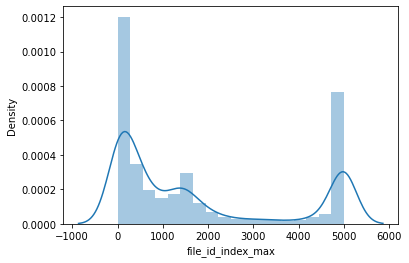

In [21]:
sns.distplot(train_analysis['file_id_index_max'])

<AxesSubplot:xlabel='label', ylabel='file_id_index_max'>

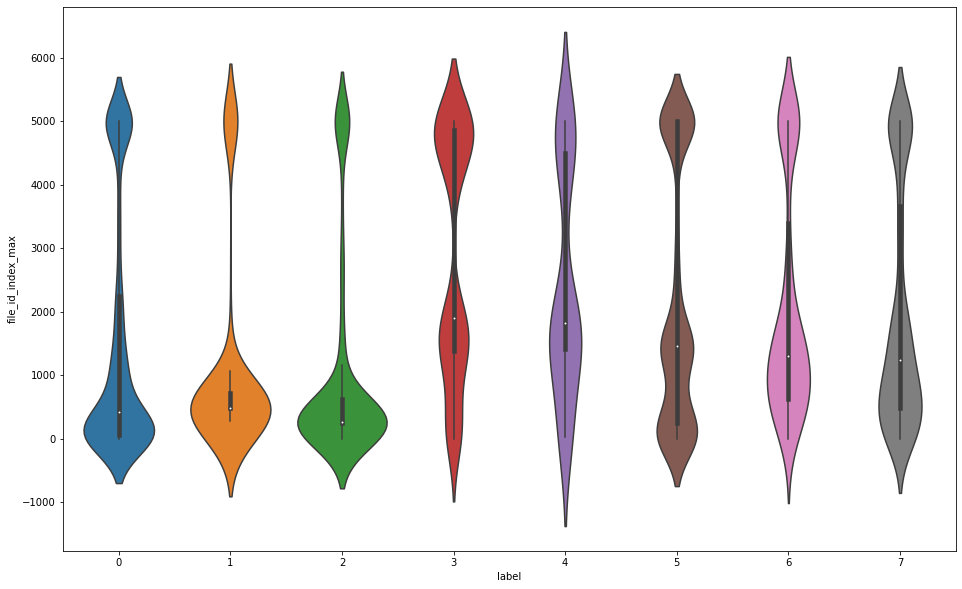

In [22]:
plt.figure(figsize=[16,10])
sns.violinplot(x =train_analysis['label'], y = train_analysis['file_id_index_max'])

<AxesSubplot:xlabel='label', ylabel='file_id_index_max'>

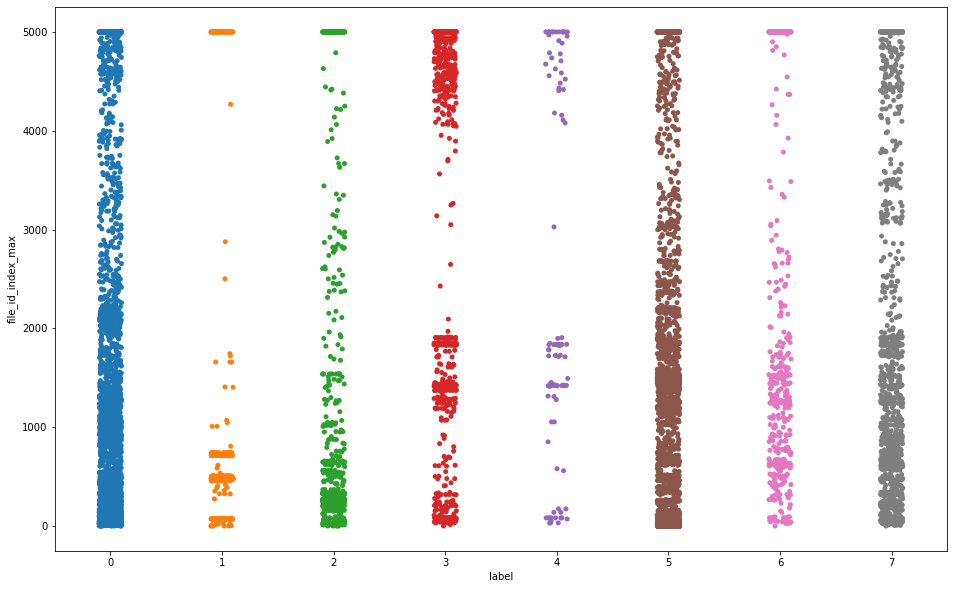

In [23]:
plt.figure(figsize=[16,10])
sns.stripplot(x =train_analysis['label'], y = train_analysis['file_id_index_max'])

In [24]:
dic_ = train.groupby('file_id')['tid'].nunique().to_dict()
train_analysis['file_id_tid_nunique'] = train_analysis['file_id'].map(dic_).values

C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='file_id_tid_nunique', ylabel='Density'>

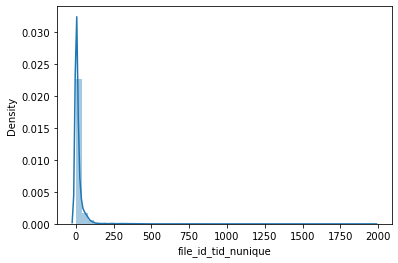

In [25]:
sns.distplot(train_analysis['file_id_tid_nunique'])

Text(0, 0.5, 'label_number')

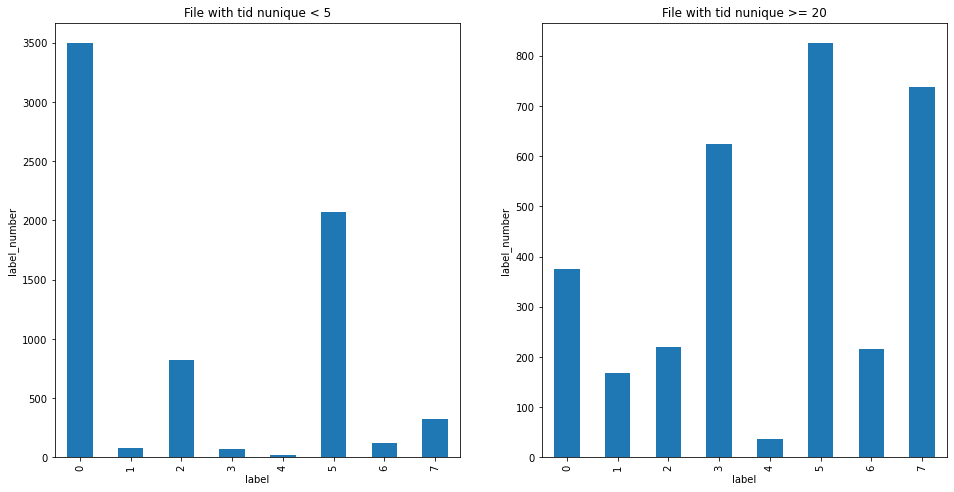

In [26]:
plt.figure(figsize=[16,8])
plt.subplot(121)
train_analysis.loc[train_analysis.file_id_tid_nunique < 5]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('File with tid nunique < 5')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(122)
train_analysis.loc[train_analysis.file_id_tid_nunique >= 20]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('File with tid nunique >= 20')
plt.xlabel('label')
plt.ylabel('label_number')

<AxesSubplot:xlabel='label', ylabel='file_id_tid_nunique'>

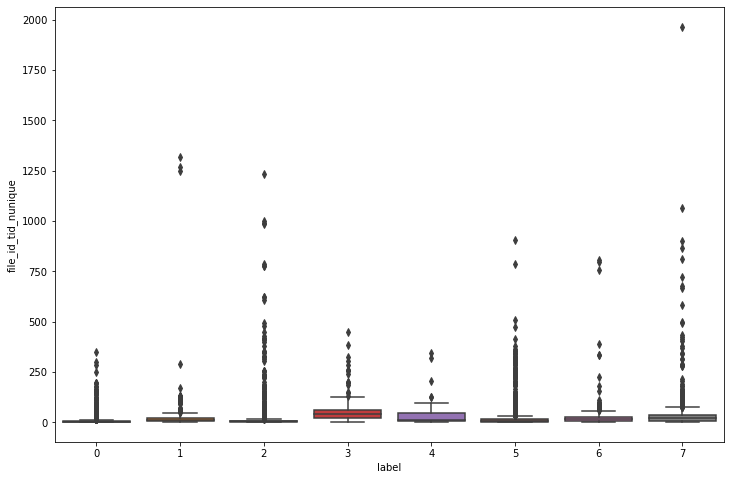

In [27]:
plt.figure(figsize=[12,8])
sns.boxplot(x =train_analysis['label'], y = train_analysis['file_id_tid_nunique'])

<AxesSubplot:xlabel='label', ylabel='file_id_tid_nunique'>

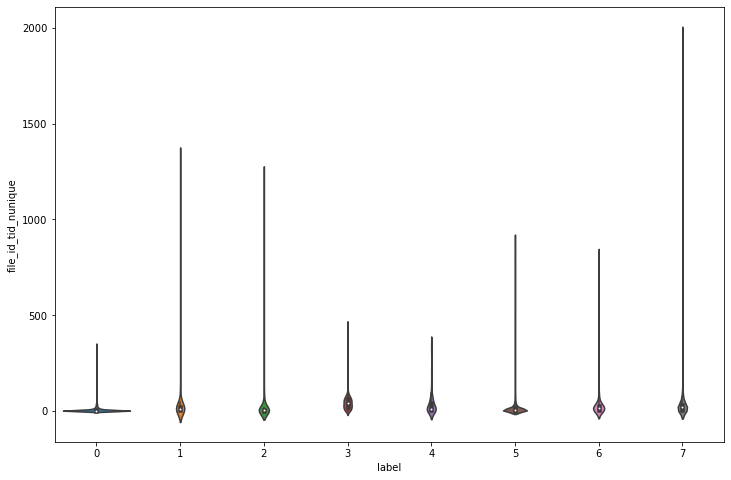

In [28]:
plt.figure(figsize=[12,8])
sns.violinplot(x =train_analysis['label'], y = train_analysis['file_id_tid_nunique'])

In [29]:
dic_ = train.groupby('file_id')['tid'].max().to_dict()
train_analysis['file_id_tid_max'] = train_analysis['file_id'].map(dic_).values

C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='file_id_tid_max', ylabel='Density'>

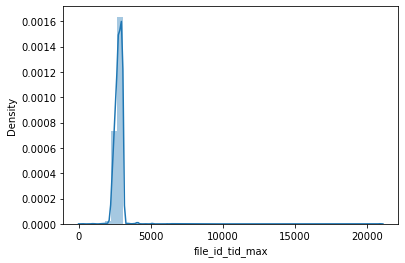

In [30]:
sns.distplot(train_analysis['file_id_tid_max'])

Text(0, 0.5, 'label_number')

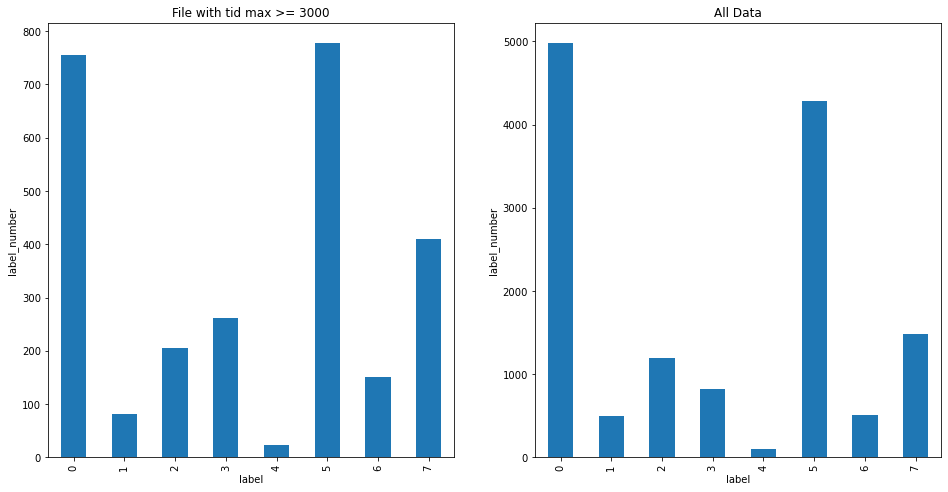

In [31]:
plt.figure(figsize=[16,8])
plt.subplot(121)
train_analysis.loc[train_analysis.file_id_tid_max >= 3000]['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('File with tid max >= 3000')
plt.xlabel('label')
plt.ylabel('label_number')

plt.subplot(122)
train_analysis['label'].value_counts().sort_index().plot(kind = 'bar')
plt.title('All Data')
plt.xlabel('label')
plt.ylabel('label_number')

In [32]:
train['api_label'] = train['api'] + '_' + train['label'].astype(str)
dic_ = train['api_label'].value_counts().to_dict()

In [33]:
df_api_label = pd.DataFrame.from_dict(dic_,orient = 'index').reset_index()
df_api_label.columns = ['api_label', 'api_label_count']

In [34]:
df_api_label['label'] = df_api_label['api_label'].apply(lambda x:int(x.split('_')[-1]))

In [35]:
labels = df_api_label['label'].unique()
for label in range(8):
    print('*' * 50, label,'*' * 50)
    print(df_api_label.loc[df_api_label.label == label].sort_values('api_label_count').iloc[-5:][['api_label','api_label_count']])
    print('*' * 103)

************************************************** 0 **************************************************
                   api_label  api_label_count
20     CryptDecodeObjectEx_0           808724
19           RegOpenKeyExW_0           815653
11  LdrGetProcedureAddress_0          1067389
9                  NtClose_0          1150929
5         RegQueryValueExW_0          1793509
*******************************************************************************************************
************************************************** 1 **************************************************
                    api_label  api_label_count
180             RegCloseKey_1            83134
160              NtReadFile_1           101051
102  LdrGetProcedureAddress_1           199218
75                  NtClose_1           268922
72         RegQueryValueExW_1           283562
*******************************************************************************************************
**************************